**Fraud analytics Auto Insurance**


Variables which are present in the dataset are (39 variables)

       'months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'

**Importing Libraries**

In [1]:
#Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
# for modelling
import sklearn
import imblearn

Using TensorFlow backend.


In [2]:
#working dir setup
os.chdir('F:/Use Cases ML/Fraud Analytics Insurance Assessment')
#read the datasets
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [4]:
data.shape

(1000, 39)

In [4]:
#describe the data for statistical info
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [5]:
#lets check for null values
data.isnull().sum() #there exists no null values

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [6]:
#but there are  '?' symbols which we can replace with NaN and later with 'mean' values
data = data.replace('?',np.NaN)

In [7]:
data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [9]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
n_v = []
for i in data:
    if data[i].isnull().any():
        n_v.append(i)

In [9]:
n_v

['collision_type', 'property_damage', 'police_report_available']

In [10]:
#null value treatment
data['collision_type'].fillna(data['collision_type'].mode()[0],inplace=True)
data.property_damage.fillna(data['property_damage'].mode()[0],inplace=True)
data.police_report_available.fillna(data['police_report_available'].mode()[0],inplace=True)

In [11]:
data.isnull().any().any()

False

In [12]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                      NO               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [13]:
#scatter plot 'policy_annual_premium' vs 'total_claim_amount'
px.scatter(data,x='total_claim_amount',y='policy_annual_premium',color='insured_sex',marginal_x='rug',marginal_y='histogram')

In [16]:
fig = px.scatter_matrix(data,dimensions=['injury_claim', 'property_claim','vehicle_claim'],color='insured_sex')
fig.show()

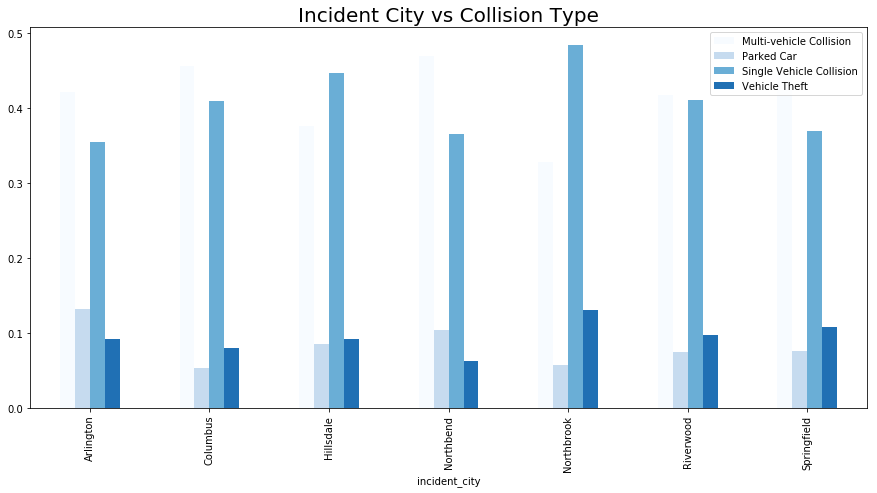

In [17]:
incident = pd.crosstab(data['incident_city'], data['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident City vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

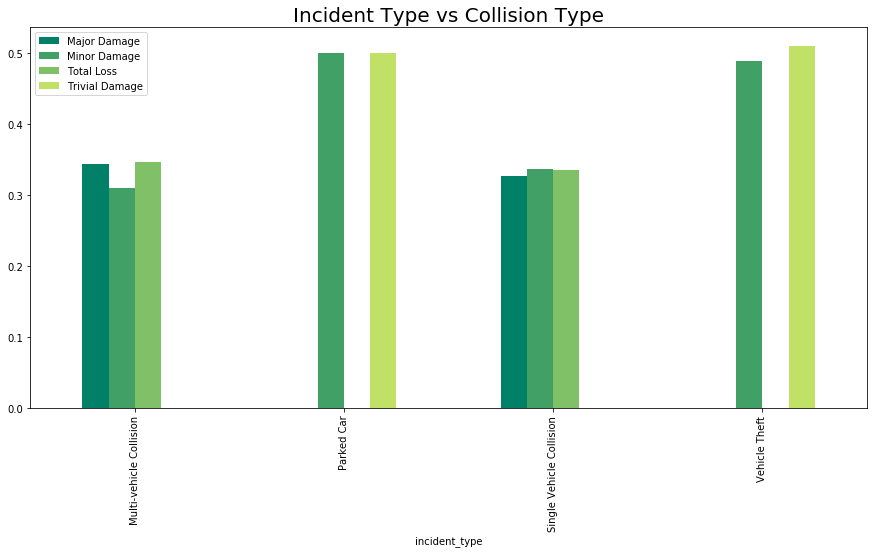

In [18]:
#
incident = pd.crosstab(data['incident_type'], data['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

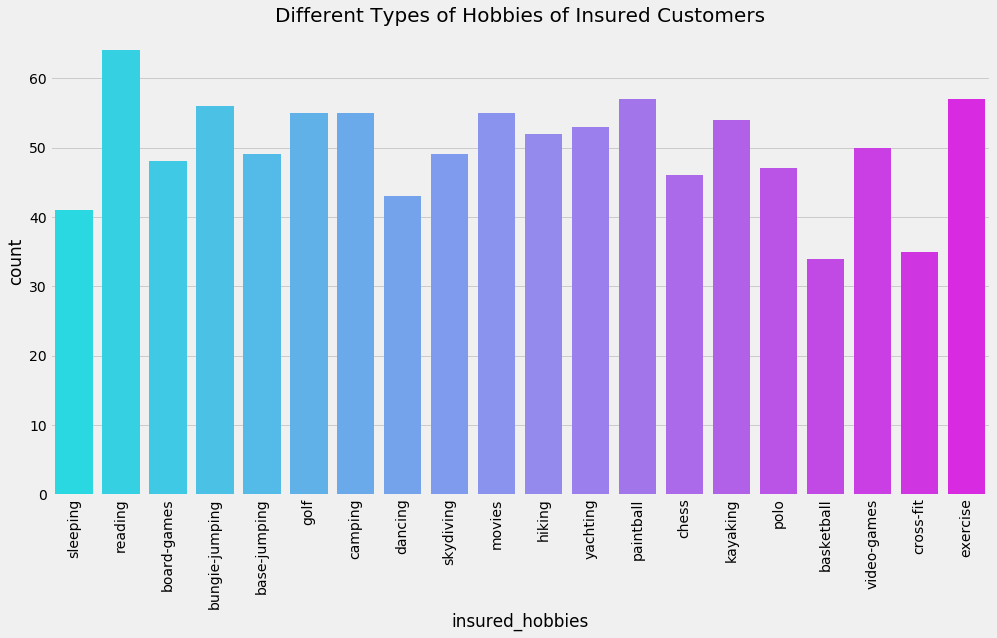

In [19]:
#'Different Types of Hobbies of Insured Customers' 
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 

In [14]:
fraud = data['fraud_reported'].value_counts()
label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

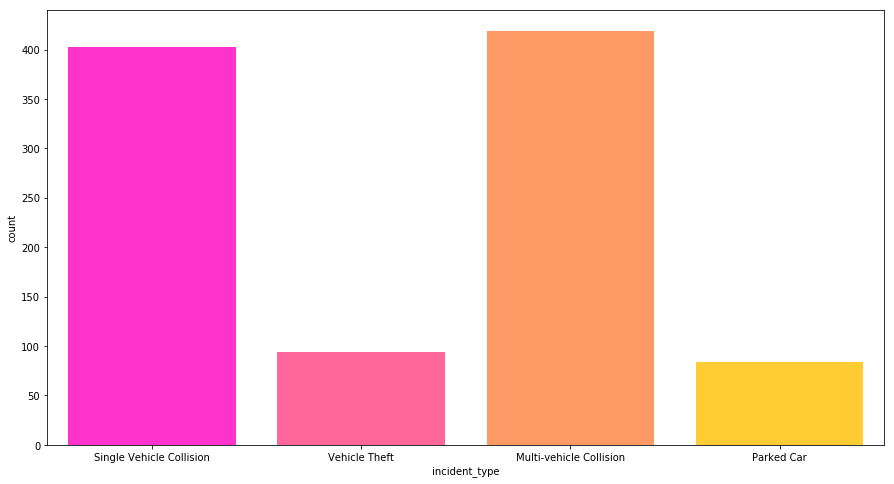

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['incident_type'],palette = 'spring',saturation=1);

In [22]:
sex = data['insured_sex'].value_counts()
rel = data['insured_relationship'].value_counts()

label_sex = sex.index
size_sex = sex.values

label_rel = rel.index
size_rel = rel.values

colors = ['aqua', 'gold']
trace = go.Pie(
         labels = label_sex, values = size_sex, marker = dict(colors = colors), name = 'Gender', hole = 0.3)
colors2 = ['pink', 'lightblue','lightgreen','grey','red']
trace2 = go.Pie(labels = label_rel, values = size_rel, marker = dict(colors = colors2), name = 'Relationship',
                hole = 0.3)

df = [trace]
df2 = [trace2]

layout1 = go.Layout(
           title = 'Gender of the Customers')
layout2 = go.Layout(
           title = 'Relationship')

fig = go.Figure(data = df, layout = layout1)
fig2 = go.Figure(data = df2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [23]:
trace = go.Box(
          x = data['auto_make'],
          y = data['vehicle_claim'],
          opacity = 0.7,
          marker = dict(
                 color = 'rgb(215, 195, 5, 0.5)'
          )
)
df = [trace]

layout = go.Layout(
    title = 'Automobile Company vs Vehicle Claim')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

**Data Preprocessing**

In [16]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'],errors='coerce')

In [25]:
#encoding fraud reported , "Y" == 0   "N" == 1
map_fraud = {"Y":0,"N":1}
data.fraud_reported = data.fraud_reported.map(map_fraud)

In [26]:
data.fraud_reported.value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [27]:
#statistics between automodel,'auto_make' and 'fraud_reported' in descending order
data[['auto_model','auto_make','fraud_reported']].groupby(['auto_model','auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_model   auto_make  fraud_reported
0         3 Series         BMW        0.944444
31             RSX      Accura        0.916667
25          Malibu   Chevrolet        0.900000
36        Wrangler        Jeep        0.880952
29      Pathfinder      Nissan        0.870968
35          Ultima      Nissan        0.869565
9            Camry      Toyota        0.857143
11         Corolla      Toyota        0.850000
8              CRV       Honda        0.850000
21          Legacy      Suburu        0.843750
27            Neon       Dodge        0.837838
3               95        Saab        0.814815
33              TL      Accura        0.800000
2               93        Saab        0.800000
23             MDX      Accura        0.777778
6           Accord       Honda        0.769231
17  Grand Cherokee        Jeep        0.760000
13          Escape        Ford        0.750000
12            E400    Mercedes        0.740741
4               A3        Audi        0.729730
18      Highlander      Toyota        0.727273
28          Passat  Volkswagen        0.727273
1              92x        Saab        0.714286
20           Jetta  Volkswagen        0.714286
16          Fusion        Ford        0.714286
15       Forrestor      Suburu        0.714286
26          Maxima      Nissan        0.708333
19         Impreza      Suburu        0.700000
37              X5         BMW        0.695652
30             RAM       Dodge        0.674419
22              M5         BMW        0.666667
5               A5        Audi        0.656250
10           Civic       Honda        0.636364
14            F150        Ford        0.629630
34           Tahoe   Chevrolet        0.625000
7             C300    Mercedes        0.611111
24           ML350    Mercedes        0.600000
32       Silverado   Chevrolet        0.590909
38              X6         BMW        0.562500

In [28]:
data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

In [29]:
data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_make  fraud_reported
7         Jeep        0.835821
9       Nissan        0.820513
12      Toyota        0.814286
0       Accura        0.808824
10        Saab        0.775000
11      Suburu        0.762500
4        Dodge        0.750000
6        Honda        0.745455
3    Chevrolet        0.723684
2          BMW        0.722222
13  Volkswagen        0.720588
1         Audi        0.695652
5         Ford        0.694444
8     Mercedes        0.661538

In [30]:
data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

In [31]:
#fraud_reported according to police_report_available
data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

police_report_available  fraud_reported
1                     YES        0.770701
0                      NO        0.744898

In [32]:
#replace police_report_available with fraud_reported
data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))

In [33]:
#similarly we can make for 'property_damage'
data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

property_damage  fraud_reported
0              NO        0.757880
1             YES        0.741722

In [34]:
#property_damage
data['property_damage'] = data['property_damage'].replace(('NO','YES'),(0.76,0.74))

In [35]:
data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_city  fraud_reported
4    Northbrook        0.778689
5     Riverwood        0.776119
3     Northbend        0.765517
6   Springfield        0.757962
2     Hillsdale        0.751773
1      Columbus        0.738255
0     Arlington        0.710526

In [36]:
# Encode incident_city
data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

In [37]:
data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_state  fraud_reported
6             WV        0.820276
1             NY        0.778626
5             VA        0.772727
3             PA        0.733333
4             SC        0.705645
0             NC        0.690909
2             OH        0.565217

In [38]:
# Encode incident_state
data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

In [39]:
data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

authorities_contacted  fraud_reported
2                  None        0.934066
4                Police        0.791096
1                  Fire        0.730942
0             Ambulance        0.709184
3                 Other        0.681818

In [40]:
#Encode authorities_contacted
data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

In [41]:
data.authorities_contacted.value_counts()

0.79    292
0.73    223
0.68    198
0.70    196
0.94     91
Name: authorities_contacted, dtype: int64

In [42]:
#correlation of incident_severity with the target
data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_severity  fraud_reported
3    Trivial Damage        0.933333
1      Minor Damage        0.892655
2        Total Loss        0.871429
0      Major Damage        0.394928

In [43]:
#encoding for incident severity
data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

In [44]:
#collision_type with the target
data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

collision_type  fraud_reported
1   Rear Collision        0.772340
2   Side Collision        0.746377
0  Front Collision        0.724409

In [45]:
#Encoding for collision type
data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

In [46]:
data['collision_type'].value_counts()

0.78    470
0.74    276
0.72    254
Name: collision_type, dtype: int64

In [47]:
#incident_type with the target
df = data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

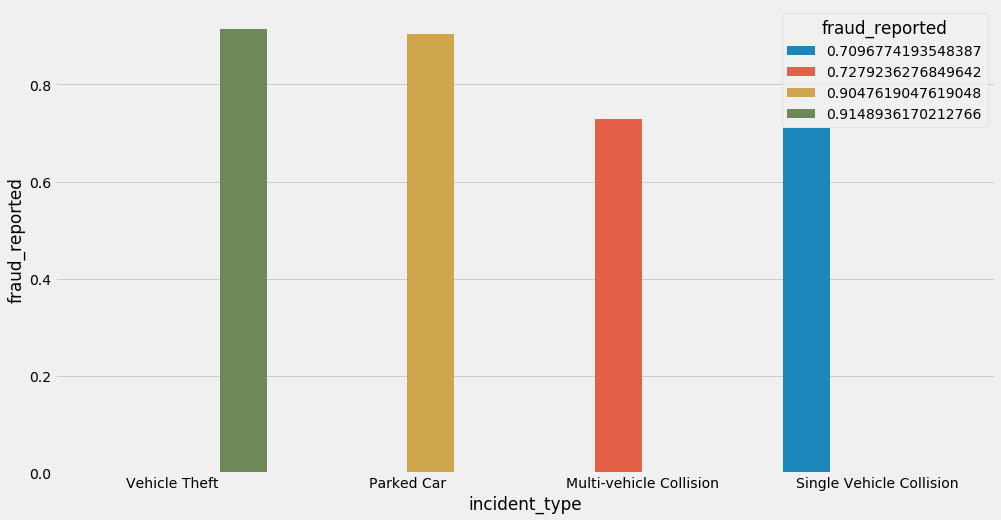

In [48]:
sns.barplot(data=df,x='incident_type',y='fraud_reported',hue='fraud_reported');

In [49]:
#Encoing for incident type

data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))

In [50]:
data['incident_type'].value_counts()

0.72    419
0.70    403
0.91     94
0.90     84
Name: incident_type, dtype: int64

In [51]:
#Analyse 'incident_date'
data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

# extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

In [52]:
#relationship between insured_relationship and fraud reported
df2=data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

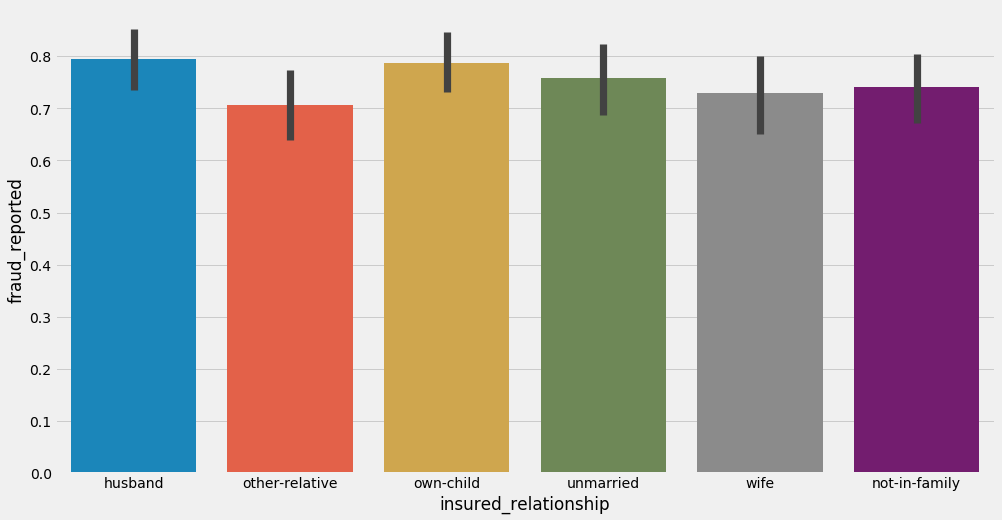

In [53]:
sns.barplot(data=data,x='insured_relationship',y='fraud_reported');

In [54]:
#Encoding for insured relationship
data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

In [55]:
#relation between insured_hobbies and fraud reported
data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_hobbies  fraud_reported
4          camping        0.909091
11        kayaking        0.907407
9             golf        0.890909
7          dancing        0.883721
3   bungie-jumping        0.839286
12          movies        0.836364
1       basketball        0.823529
8         exercise        0.807018
17        sleeping        0.804878
18     video-games        0.800000
16       skydiving        0.775510
13       paintball        0.771930
10          hiking        0.769231
0     base-jumping        0.734694
15         reading        0.734375
14            polo        0.723404
2      board-games        0.708333
19        yachting        0.698113
6        cross-fit        0.257143
5            chess        0.173913

In [56]:
# let's do encoding for insured_hobbies
data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

In [57]:
#relation between insured_occupation and fraud reported
data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_occupation  fraud_reported
7       other-service        0.830986
8     priv-house-serv        0.830986
0        adm-clerical        0.830769
5   handlers-cleaners        0.796296
9      prof-specialty        0.788235
10    protective-serv        0.777778
6   machine-op-inspct        0.763441
1        armed-forces        0.753623
11              sales        0.723684
12       tech-support        0.717949
13   transport-moving        0.708333
2        craft-repair        0.702703
4     farming-fishing        0.698113
3     exec-managerial        0.631579

In [58]:
# let's perform encoding for insured_occupation
data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))

In [59]:
#relation of insured_education_level with faud_reported
df3=data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

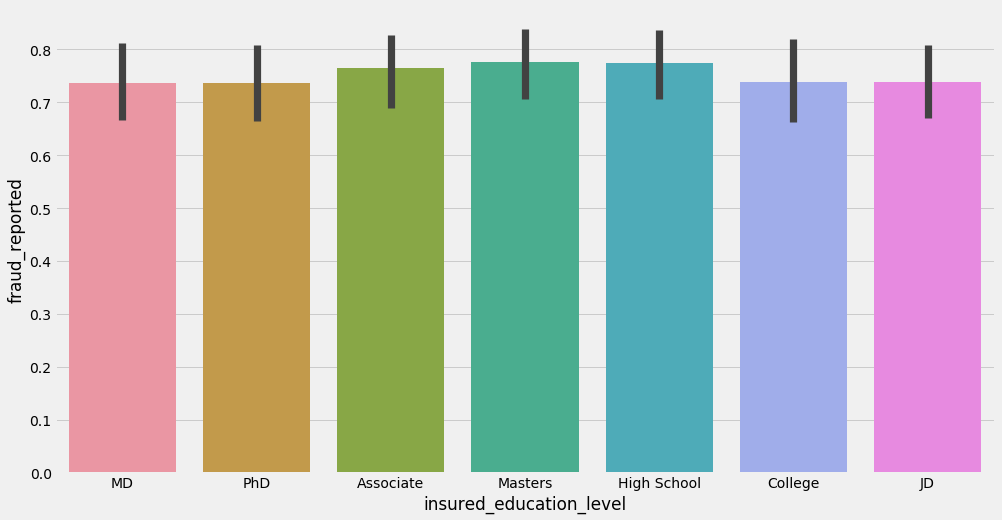

In [60]:
sns.barplot(data=data,x='insured_education_level',y='fraud_reported');

In [61]:
# let's perform target encoding
data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))

In [62]:
# relation of insured sex and fraud reported
data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

insured_sex  fraud_reported
0      FEMALE        0.765363
1        MALE        0.738661

In [63]:
# encoding for sex
data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))

In [64]:
# relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

policy_state  fraud_reported
0           IL        0.772189
1           IN        0.745161
2           OH        0.741477

In [65]:
# target encoding for policy_state
data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

In [66]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model','policy_csl'], axis = 1)

In [67]:
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48         0.740               1000   
1                 228   42         0.745               2000   
2                 134   29         0.740               2000   
3                 256   41         0.770               2000   
4                 228   44         0.770               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132         0.73   
1                1197.22         5000000       468176         0.73   
2                1413.14         5000000       430632         0.76   
3                1415.74         6000000       608117         0.76   
4                1583.91         6000000       610706         0.73   

   insured_education_level  insured_occupation  ...  police_report_available  \
0                     0.72                0.70  ...                     0.74   
1                     0.72                0.76  ...                     0.77   
2                     0.71                0.72  ...                     0.77   
3                     0.71                0.75  ...                     0.77   
4                     0.76                0.72  ...                     0.77   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       0.77   
1                5070           780             780           3510       0.66   
2               34650          7700            3850          23100       0.75   
3               63400          6340            6340          50720       0.73   
4                6500          1300             650           4550       0.80   

   auto_year  fraud_reported  incident_month  incident_day  
0       2004               0               1            25  
1       2007               0               1            21  
2       2007               1               2            22  
3       2014               0              10             1  
4       2009               1               2            17  

[5 rows x 35 columns]

In [68]:
#Devide the data 'predictors = x' and 'response = y'
x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

In [69]:
#Train and Test split in 80 , 20 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [70]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 34)
Shape of x_test : (200, 34)
Shape of y_train : (800,)
Shape of y_test : (200,)


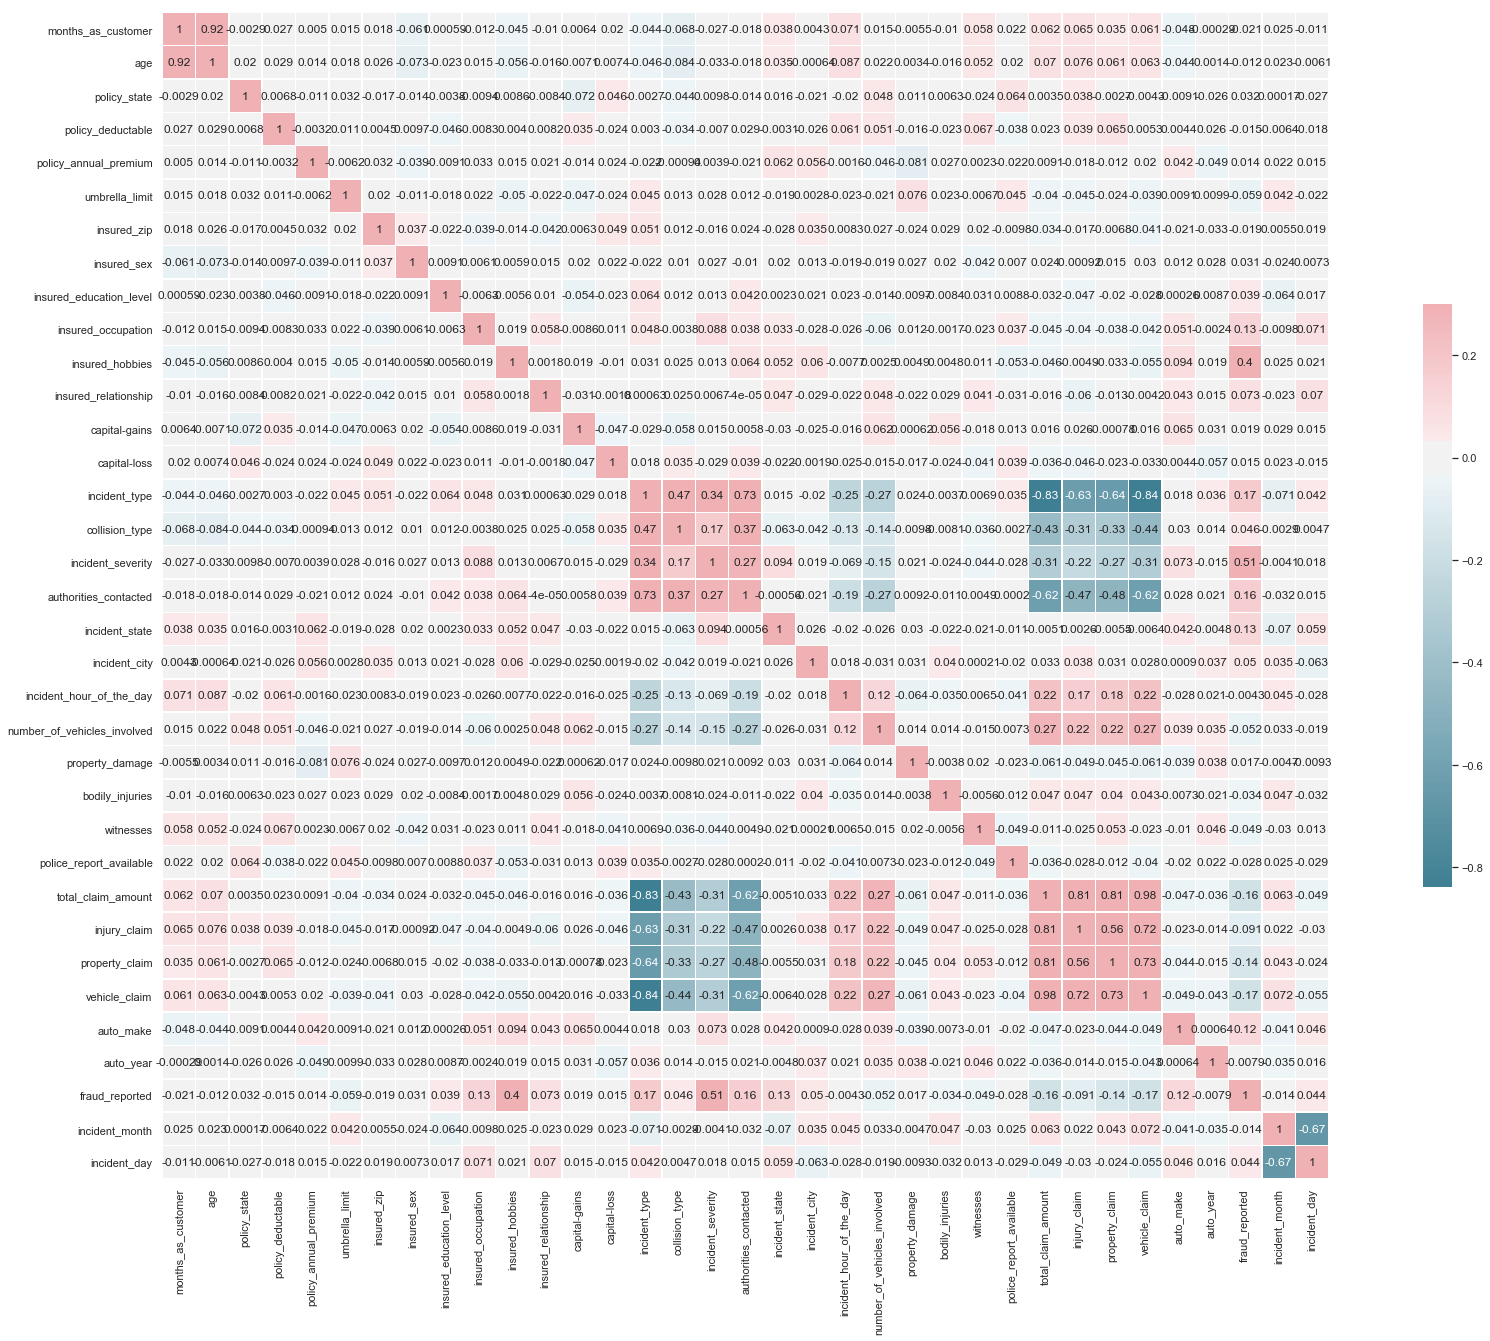

In [71]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

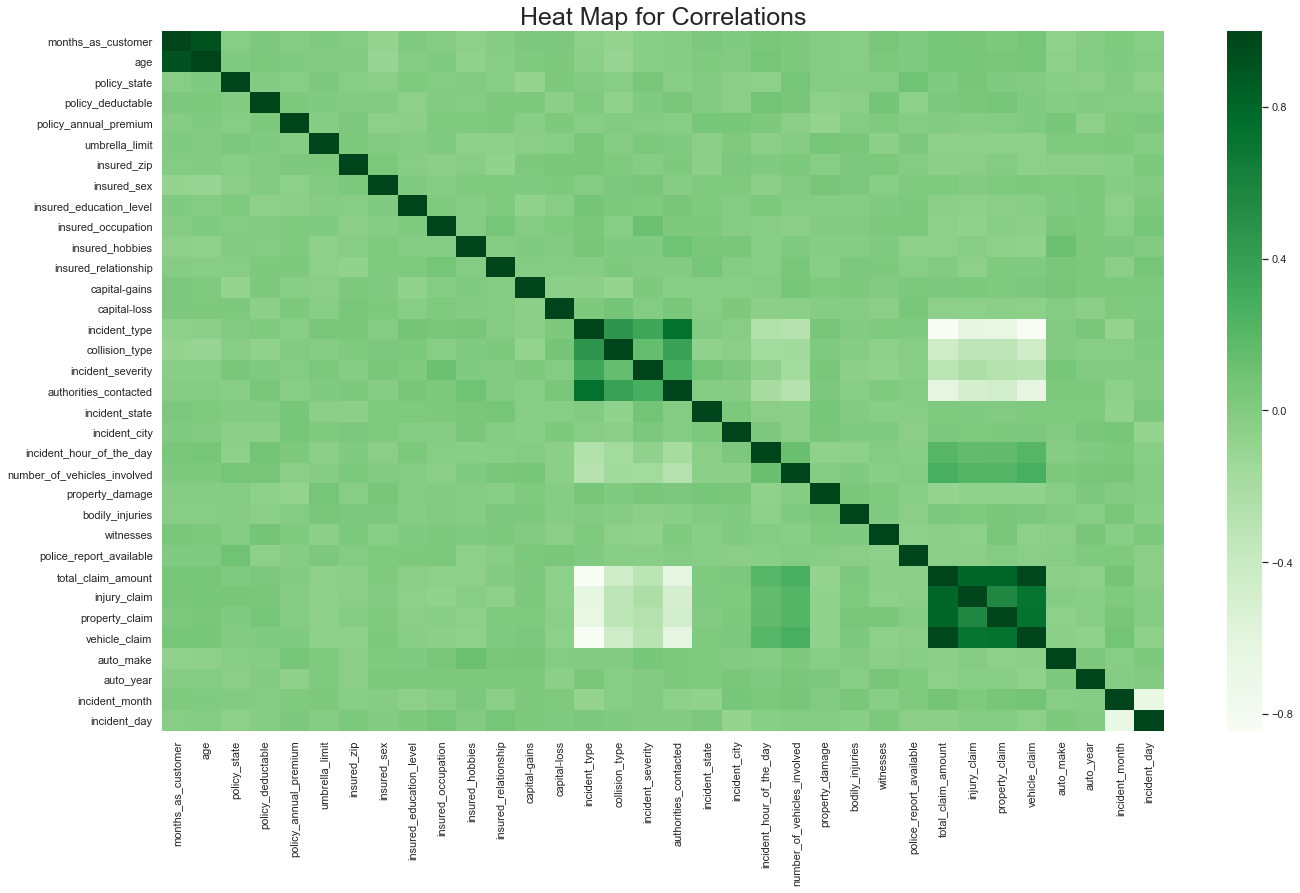

In [72]:
#Lets check the co-relation among the attributes
plt.rcParams['figure.figsize'] = (20, 12)
sns.heatmap(x_train.corr(), cmap = 'Greens')
plt.title('Heat Map for Correlations', fontsize = 25)
plt.show()

In [73]:
#Let see final dataset preprocessed 
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48         0.740               1000   
1                 228   42         0.745               2000   
2                 134   29         0.740               2000   
3                 256   41         0.770               2000   
4                 228   44         0.770               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132         0.73   
1                1197.22         5000000       468176         0.73   
2                1413.14         5000000       430632         0.76   
3                1415.74         6000000       608117         0.76   
4                1583.91         6000000       610706         0.73   

   insured_education_level  insured_occupation  ...  police_report_available  \
0                     0.72                0.70  ...                     0.74   
1                     0.72                0.76  ...                     0.77   
2                     0.71                0.72  ...                     0.77   
3                     0.71                0.75  ...                     0.77   
4                     0.76                0.72  ...                     0.77   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080       0.77   
1                5070           780             780           3510       0.66   
2               34650          7700            3850          23100       0.75   
3               63400          6340            6340          50720       0.73   
4                6500          1300             650           4550       0.80   

   auto_year  fraud_reported  incident_month  incident_day  
0       2004               0               1            25  
1       2007               0               1            21  
2       2007               1               2            22  
3       2014               0              10             1  
4       2009               1               2            17  

[5 rows x 35 columns]

**Modelling with Ensemble Techniques**

**Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=0)

In [76]:
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.815


In [77]:
#A balanced random forest randomly under-samples each boostrap sample to balance it.
model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.8825
Testing Accuarcy:  0.85


In [78]:
cl_report = classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        57
           1       0.93      0.85      0.89       143

    accuracy                           0.85       200
   macro avg       0.81      0.85      0.83       200
weighted avg       0.86      0.85      0.85       200



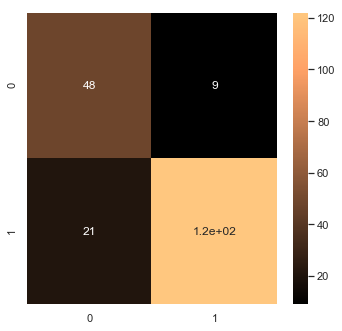

In [79]:
#Confusion Matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

In [80]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [81]:
#Logit Model
model_logit = LogisticRegression(penalty='l1')
model_logit.fit(x_train, y_train)
y_pred_logit = model_logit.predict(x_test)

print("Training Accuracy: ", model_logit.score(x_train, y_train))
print('Testing Accuarcy: ', model_logit.score(x_test, y_test))

Training Accuracy:  0.8675
Testing Accuarcy:  0.855


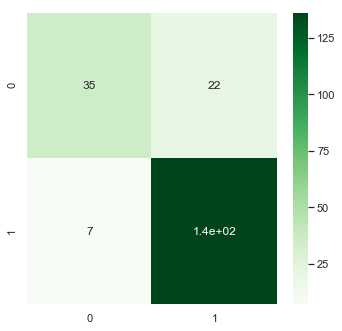

In [82]:
#Confusion Matrix Logistic Regression
plt.rcParams['figure.figsize'] = (5, 5)
cm_logit = confusion_matrix(y_test, y_pred_logit)
sns.heatmap(cm_logit, annot = True, cmap = 'Greens')
plt.show()

**Applying Sampling Technique**

**Under Sampling**

In [83]:
# Sampling Techniques are used to balance the target variable which are not in same samples
# There are several sampling techniques
# 1)Under Sampling
# 2)Up sampling
# 3)SMOT
# 4)Class Weight
y.value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [84]:
#We can see in our target variable there are 247 == 0 and 753 == 1 values present , which will make the model overfit
# resulting the model will be biased towards 1 as 753 records says 1
frauds = np.array(data[data['fraud_reported'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

247


In [85]:
normal_indices = data[data['fraud_reported'] == 1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

753


In [86]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

247


In [87]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

494


In [88]:
# creating the undersample data
undersample_data = data.iloc[under_sample, :]

In [89]:
undersample_data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                  328   48         0.740               1000   
1                  228   42         0.745               2000   
3                  256   41         0.770               2000   
5                  256   39         0.740               1000   
14                 180   38         0.740               2000   

    policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                 1406.91               0       466132         0.73   
1                 1197.22         5000000       468176         0.73   
3                 1415.74         6000000       608117         0.76   
5                 1351.10               0       478456         0.76   
14                1301.13               0       476685         0.76   

    insured_education_level  insured_occupation  ...  police_report_available  \
0                      0.72                0.70  ...                     0.74   
1                      0.72                0.76  ...                     0.77   
3                      0.71                0.75  ...                     0.77   
5                      0.71                0.71  ...                     0.77   
14                     0.73                0.76  ...                     0.74   

    total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                71610          6510           13020          52080   
1                 5070           780             780           3510   
3                63400          6340            6340          50720   
5                64100          6410            6410          51280   
14               46200          4200            8400          33600   

    auto_make  auto_year  fraud_reported  incident_month  incident_day  
0        0.77       2004               0               1            25  
1        0.66       2007               0               1            21  
3        0.73       2014               0              10             1  
5        0.77       2003               0               2             1  
14       0.75       2003               0               1            15  

[5 rows x 35 columns]

In [90]:
# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']

print(x_u.shape)
print(y_u.shape)

(494, 34)
(494, 1)


In [91]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

(395, 34)
(395, 1)
(99, 34)


In [92]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy:  0.9873417721518988
Testing Accuarcy:  0.7171717171717171


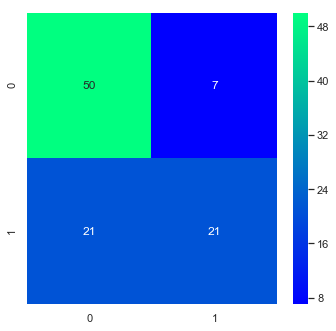

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        57
           1       0.75      0.50      0.60        42

    accuracy                           0.72        99
   macro avg       0.73      0.69      0.69        99
weighted avg       0.72      0.72      0.70        99



In [93]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred)
print(cr)

In [94]:
#Up sampling with SMOTE
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(1506, 34)
(1506,)


In [95]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(1204, 34)
(1204,)
(302, 34)
(302,)


In [96]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  0.9983388704318937
Testing Accuarcy:  0.8774834437086093


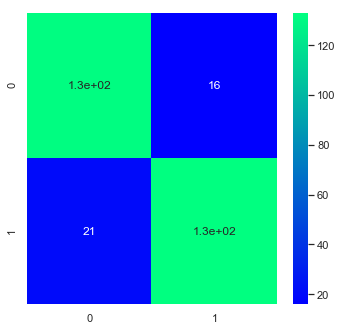

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       148
           1       0.89      0.86      0.88       154

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [97]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()
# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

In [98]:
#Applying other ML algo to check the accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [99]:
#K Fold Cross validation
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [100]:
clf = KNeighborsClassifier(n_neighbors=13)

In [101]:
score= cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring='accuracy')

In [102]:
print(score)

[0.68 0.76 0.8  0.74 0.75 0.73 0.73 0.73 0.77 0.77]


In [103]:
print(round(np.mean(score),2))

0.75


In [104]:
#Decission Tree
clf = DecisionTreeClassifier()

In [105]:
score= cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring='accuracy')

In [106]:
print(score)

[0.78 0.79 0.8  0.78 0.72 0.82 0.77 0.77 0.84 0.86]


In [107]:
print(round(np.mean(score),2))

0.79


In [108]:
#Neive Bayes
#NB
clf= GaussianNB()
score = cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.65 0.7  0.68 0.66 0.63 0.65 0.69 0.73 0.65 0.68]


In [109]:
np.mean(score)

0.672

In [110]:
clf=SVC()
score = cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.68 0.75 0.8  0.78 0.75 0.73 0.73 0.76 0.77 0.78]


In [111]:
np.mean(score)

0.753

Training Accuracy:  0.9958471760797342
Testing Accuarcy:  0.8807947019867549


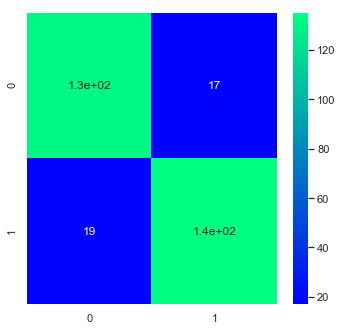

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       148
           1       0.89      0.88      0.88       154

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



In [112]:
#From above experiment it has been PROVED that UPSAMPLING with SMOTE gives the best result
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()
# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

In [113]:
# from sklearn import metrics
# fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# f, ax = plt.subplots(figsize=(10, 10))
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()